# Examen TP - Analyse Numérique et Optimisation

On commence par charger les librairies usuelles de Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl

## Exercice 1 : Résolution de système linéaire
---

L'objectif de cet exercice est de résoudre le système linéaire suivant
$$
Ax =b,
$$
où $x \in \mathbb{R}^n$ est l'inconnue, $b \in \mathbb{R}^n$ and $A \in M_n(\mathbb{R})$
à l'aide d'une méthode de type pivot de gauss.

---
> **Implémentation:** Implémentez une fonction ```PivotGauss(M,b)``` qui applique la méthode du pivot de Gauss à la matrice `M` (tout en appliquant les mêmes opération sur le vecteur `b`). Cette fonction renvoit donc une matrice `U` triangulaire supérieure en éliminant itérativement les éléments sous diagonaux de `M` ainsi qu'un vecteur `c` correspondant au vecteur `b` modifié.


In [4]:
def PivotGauss(A,b):
    U = np.copy(A)
    c = np.copy(b)
    # Votre code ici
    n = len(U)
    for i in range(n) : 
        for j in range(i+1, n) : 
            k = U[j][i]/U[i][i]
            U[j] = U[j]-k*U[i]
            c[j] = c[j]-k*c[i]
    return U,c

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [5]:
A = np.array([[3,0,1],[9,4,5],[12,8,9]])
b = np.array([1,3,2])
U,c = PivotGauss(A,b)
print("U =",U)
# Vous devez trouver
# U = array([[3, 0, 1],
#            [0, 4, 2],
#            [0, 0, 1]])


U = [[3 0 1]
 [0 4 2]
 [0 0 1]]


> **Implémentation:** Implémentez une fonction ```Remontee(U,c)``` qui applique la méthode de la remontée au système triangulaire inférieur $Ux = c$ et qui renvoit donc la solution $x$. On pourra utiliser la fonction `reversed` qui renverse l'ordre d'un itérable ou d'une liste.

In [6]:
def Remontee(U,c):
    # Votre code ici
    n = len(U)
    x = np.zeros(n, dtype=int)
    for i in reversed(range(n)) : 
        if i == n-1 : 
            x[i] = c[i]
        else : 
            b = np.dot(U[i][i+1:], x[i+1:])
            x[i] = (c[i]-b)/U[i][i]
    return x

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [7]:
A = np.array([[3,0,1],[9,4,5],[12,8,9]])
b = np.array([1,3,2])
U,c = PivotGauss(A,b)
x = Remontee(U,c)
print('x =',x)
# Vous devez trouver
# x = [ 1.  1. -2.]


x = [ 1  1 -2]


## Exercice 2 : Minimisation quadratique
---
Dans l'industrie, on veut souvent résoudre des systèmes linéaires du type
$$ Au=f$$
Pour lesquels on sait que la matrice $A$ est définie positive mais pour lesquels on n'a PAS accès à la matrice $A$.
Un bon exemple est la résolution de l'équation de la température stationnaire d'un fil de cuivre dont les extrémités sont fixés à la température nulle. Dans l'exemple suivant, la matrice $A$ n'est pas calculée mais on donne la fonction $A()$ qui calcule le produit matrice-vecteur. Ici $n$ est le nombre de points de discrétisation le long du fil de cuivre (on peut monter jusqu'à $n$ qui vaut plusieurs millions !!). Dans la case suivante, vous n'avez rien à coder !!

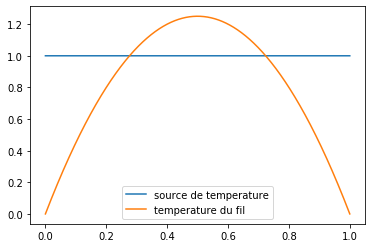

9.132479144463233e-05


In [8]:
n=100000
f=np.ones(n)
x=np.linspace(0,1,n+2)[1:-1]
u=np.zeros(n)
u=5*x*(1-x)
def A(u) :
    v=np.zeros(n)
    v=-2*u
    v[1:]+=u[:-1]
    v[:-1]+=u[1:]
    return -0.1*(n+1)**2*v
plt.plot(x,f,label='source de temperature')
plt.plot(x,u,label='temperature du fil')
plt.legend()
plt.show()
print(np.linalg.norm(A(u)-f))

Dans le cas $f=1$, on connaît la solution. Dans les autres cas, il faut la faire calculer. L'objectif est donc de calculer pour $n=100000$ la solution de $Au=f$
sachant que la seule chose que l'on sait sur $A$ est de calculer le produit $v=Au$. Pour cela on considère
$J(u)=\frac 1 2 (Au,u)-(f,u)$. En se souvenant du fait que $A$ est symétrique définie positive et que
$\nabla J =Au-f$ et que dans ce cas $J$ est strictement convexe, on veut donc minimiser $J$. Ecrire une fonction oracle qui prend en argument $u$ et qui rend $J(u)$ et $\nabla J(u)$.

In [9]:
def A(u) :
    v=np.zeros(n)
    v=-2*u
    v[1:]+=u[:-1]
    v[:-1]+=u[1:]
    return -0.1*(n+1)**2*v

def oracle(u) :
    J=0
    grad=np.zeros(n)
    # Votre code ici
    J = (1/2)*np.dot(A(u),u)-np.dot(f,u)
    grad = A(u)-f
    return J,grad


In [10]:
n=3
f=np.array([-1.,76.,23])
u=np.array([1.,5.,6.])
J,grad=oracle(u)
print(J,grad)
# Vous devez trouver
# -473.8  [ -3.8 -71.2 -11.8]


-473.8 [ -3.8 -71.2 -11.8]


Lancez maintenant un algorithme de gradient à pas fixe sur le problème d'optimisation. Vous fixerez le pas à $1.e-2$.
Comme critère d'arrêt, vous metterez un nombre d'itérations maximum à 1000 et vous vous arrêterez si la norme du gradient de $J$ devient plus petite que $1.e-3$. Pour chaque itération, vous devez imprimer dans cet ordre : le numéro de l'itération en cours, la valeur de J, et la norme du gradient.

In [11]:
n=10
f=np.zeros(n)
f[4]=1.
u=np.zeros(n)

def Gradient (function,xini,h=1e-2):
    k = 0
    x = np.copy(xini)
    X = [x]
    df = function(x)[1]
    print(k, df, np.linalg.norm(df))
    while k<1000 and np.linalg.norm(df)>1e-3 : 
        J, df = function(x)
        x = x-h*df
        X = X+[x]
        k = k+1
        print(k, J, np.linalg.norm(df))
    return k,x,X

k,x,X = Gradient(oracle, u)

# Vous devez imprimer
#0 0.0 1.0
#1 -0.0009879 0.975950029458476
# ....
#999 -0.09989200218074554 0.15846155455930575
#1000 -0.09991709992822835 0.1583061001086834

0 [-0. -0. -0. -0. -1. -0. -0. -0. -0. -0.] 1.0
1 0.0 1.0
2 -0.00879 0.7770752859279466
3 -0.014319763899999999 0.6575380153800996
4 -0.01839473099510274 0.5880688283469702
5 -0.021711794533336038 0.543352225987615
6 -0.02457314866060484 0.5117482367063892
7 -0.027127663227168333 0.48775760372352345
8 -0.029458137150226667 0.46859946063530405
9 -0.03161556403144494 0.4527434464176781
10 -0.03363392579829837 0.43927478743478865
11 -0.03553723842544883 0.42760621728605436
12 -0.03734323221163254 0.41733818798798583
13 -0.03906543519237277 0.40818599800949357
14 -0.040714434267078464 0.3999391776812358
15 -0.0422986816881708 0.3924374982923869
16 -0.04382503469069277 0.38555608343247244
17 -0.04529913044604905 0.37919576965577995
18 -0.0467256549934051 0.37327662970425246
19 -0.04810854136453921 0.3677334737458619
20 -0.04945111887808063 0.3625126294834949
21 -0.05075622779095839 0.3575695746582924
22 -0.052026308751179445 0.35286715416438663
23 -0.05326347351608654 0.34837420911186195
24

261 -0.11215561987072069 0.03258571833832906
262 -0.11216618611715433 0.032266290286846466
263 -0.11217654622342234 0.031949993494023735
264 -0.11218670421117759 0.03163679726499261
265 -0.11219666402361309 0.03132667120578235
266 -0.11220642952699297 0.031019585220370554
267 -0.11221600451215297 0.030715509507760683
268 -0.11222539269597238 0.030414414559091565
269 -0.1122345977228166 0.030116271154771713
270 -0.11224362316595192 0.029821050361644386
271 -0.1122524725289328 0.029528723530180132
272 -0.11226114924696162 0.029239262291694594
273 -0.11226965668822221 0.028952638555595978
274 -0.11227799815518762 0.02866882450665957
275 -0.11228617688590183 0.02838779260232734
276 -0.11229419605523672 0.02810951557003472
277 -0.1123020587761248 0.027833966404565088
278 -0.11230976810076707 0.02756111836542683
279 -0.11231732702181849 0.02729094497426012
280 -0.1123247384735493 0.027023420012266663
281 -0.11233200533298406 0.02675851751766401
282 -0.11233913042101855 0.02649621178316752
28

530 -0.11269451634056606 0.002302367870653351
531 -0.11269456908972862 0.0022797984482406997
532 -0.11269462080979152 0.002257450267113732
533 -0.11269467152083182 0.002235321158510576
534 -0.1126947212425348 0.002213408974928831
535 -0.11269476999420175 0.002191711589917377
536 -0.11269481779475747 0.002170226897870613
537 -0.11269486466275738 0.00214895281382256
538 -0.11269491061639507 0.002127887273246491
539 -0.11269495567350911 0.0021070282318532414
540 -0.11269499985159004 0.002086373665393076
541 -0.11269504316778717 0.002065921569459391
542 -0.1126950856389153 0.0020456699592945114
543 -0.11269512728146111 0.0020256168695962917
544 -0.11269516811158965 0.002005760354328191
545 -0.11269520814515063 0.0019860984865298905
546 -0.11269524739768463 0.0019666293581309356
547 -0.11269528588442884 0.0019473510797643325
548 -0.11269532362032325 0.0019282617805843633
549 -0.11269536062001656 0.0019093596080850708
550 -0.11269539689787132 0.001890642727918854
551 -0.11269543246797033 0.0

Vous allez modifier l'algorithme précédent pour essayer plusieurs pas dans la liste $[1.e-3,1.e-2,2.e-2,5.e-2,6.e-2]$. Vous devez lancer l'optimisation pour chaque pas et vous devez imprimer uniquement la dernière itération.

In [12]:
liste_pas=[1.e-3,1.e-2,2.e-2,5.e-2,6.e-2]
n=10
f=np.zeros(n)
f[4]=1.
u=np.zeros(n)

# Votre code ici
for h in liste_pas : 
    k = 0
    x = np.copy(u)
    X = [x]
    df = oracle(x)[1]
    while k<1000 and np.linalg.norm(df)>1e-3 : 
        J, df = oracle(x)
        x = x-h*df
        X = X+[x]
        k = k+1
    print(k, J, np.linalg.norm(df), "\n")

1000 -0.09989200218074555 0.15846155455930577 

615 -0.11269671353066586 0.0009966035140778495 

307 -0.11269672384890184 0.0009864021740701614 

1000 1.164262927225174e+271 3.322921413851652e+136 

1000 inf inf 



YOUR ANSWER HERE

## Exercice 3 : Equations non-linéaires
---

L'objectif de cet exercice est de trouver numériquement les solutions d'une équation non-linéaire

$$
f(x) = 0,
$$

où $x \in \mathbb{R}$ est l'inconnue. On se donne la fonction $f$ suivante, définie sur $]0,+\infty[$.

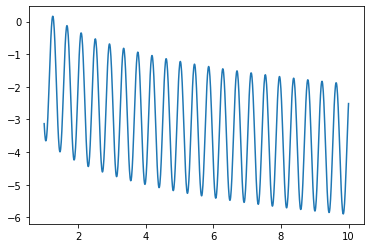

In [13]:
def f(x):
    return 2*np.cos(15*x) - np.log(5*x)

x = np.linspace(1,10,1000)
plt.plot(x,f(x))
plt.show()

On se propose dans un premier temps de mettre en place une méthode de Newton afin d'évaluer numériquement une racine de $f$. Il faut pour cela passer par la dérivée de $f$.

> **Implémentation:** Implémentez une fonction `fp(x)` correspondant à la dérivée de $f$.

In [14]:
def fp(x):
    # Votre code ici
    return -30*np.sin(15*x)-(1/x)

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [15]:
print('fp(5) = ',fp(5))
# Vous devez trouver
# fp(5) =  11.433449062282914

fp(5) =  11.433449062282914


> **Implémentation:** Implémentez une fonction `Newton(f,fp,x,eps)` mettant en oeuvre la méthode de Newton. On choisira comme critère d'arrêt un critère de stagnation: $|x_{n+1}-x_n|< \varepsilon |x_{n+1}|$ et on fixera un nombre maximal d'itérations à $100$. Cette fonction renverra donc une approximation numérique d'une racine de $f$ (pour peu que l'algorithme converge).

In [16]:
def Newton(f,fp,x,eps):
    # Votre code ici
    k = 0
    d = -f(x)/fp(x)
    while np.abs(d)>eps*np.abs(x) and k<100: 
        d = -f(x)/fp(x)
        x = x + d
        k = k+1
    return x

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [17]:
x = 1.5
eps = 1e-10
x = Newton(f,fp,x,eps)
print('x =',x)
print('f(x) =',f(x))
# Vous devez trouver
# x = 0.3311512394097984
# f(x) = 2.220446049250313e-16


x = 0.3311512394097984
f(x) = 2.220446049250313e-16


On part maintenant d'un point initial $x_0 = 14$.

> **A faire:** Lancer les lignes de code suivantes.

In [18]:
x = 14
eps = 1e-10
x = Newton(f,fp,x,eps)
print('x =',x)
print('f(x) =',f(x))

x = 14.961327701697313
f(x) = -4.720002729634476


> **A faire:** Commenter le résultat dans la case suivante.

Votre réponse ici

On se propose à présent de combiner la méthode de Newton et la méthode de la dichotomie. Le principe est le suivant:
- à l'initialisation, on dispose d'un intervalle $[a_0,\ b_0]$ tel que $f(a_0)\, f(b_0) <0$. On choisit une des bornes $a_0$ ou $b_0$ pour $x_0$ (ici on prendra $x_0 = b_0$). Puis on rentre dans une boucle sous le critère de convergence de stagnation: $|x_{n+1}-x_n|< \varepsilon |x_{n+1}|$.
- à partir du point $x_{n-1}$, on fait une itération de Newton puis on vérifie si le nouveau point $x_n$ n'est pas sorti de l'intervalle où est la racine. Si c'est le cas, on choisit de réinitialiser $$x_n= \frac{a_{n-1}+b_{n-1}}2.$$
- on calcule $f(x_n)$ et on procède par dichotomie pour localiser la racine:
    - Si $f(a_{n-1})f(x_n)<0$ alors on pose $$ b_n = x_n \quad\mbox{ et }\quad f(b_n) = f(x_n).$$
    - Si $f(a_{n-1})f(x_n)>0$ alors on pose $$ a_n = x_n \quad\mbox{ et }\quad f(a_n) = f(x_n).$$

> **Implémentation:** Implémentez une fonction `Newton_Dicho(f,a,b,eps)` qui applique la méthode combinée que l'on vient de d'expliciter. L'argument `eps` correspond à la tolérance sur le critère d'arrêt. Cette fonction renverra donc l'approximation numérique d'une racine de la fonction `f` donnée en argument et qui est contenue dans l'intervalle `[a,b]`. On prendra garde à fixer un nombre maximale d'itérations à $100$.

In [19]:
def Newton_Dicho(f,fp,a,b,eps):
    # Votre code ici
    k = 0
    x = b
    d = -f(x)/fp(x)
    while np.abs(d)>eps*np.abs(x) and k<100: 
        d = -f(x)/fp(x)
        x = x + d
        if x<a or x>b :
            x = (a+b)/2
        else : 
            if f(a)*f(x)<0 : 
                b = x
            else : 
                a = x
        k = k+1
    return x

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [20]:
a = 0.1
b = 14
eps = 1e-10
x = Newton_Dicho(f,fp,a,b,eps)
print("x = ",x)
print("f(x) = ",f(x))
# Vous devez trouver
# x =  0.8864942240215332
# f(x) =  0.0


x =  0.8864942240215332
f(x) =  0.0


## Exercice 4 : Méthode de Newton en optimisation
---
Ici on va lancer une méthode de Newton pour une fonction relativement simple, donnée par
$$f(x,y)=6e^{2x}+5e^{2y}+2e^{x+y}-8e^x-3x$$
$$\nabla f(x,y)=\begin{pmatrix}12e^{2x}+2e^{x+y}-8e^x-3 \\ ?? \end{pmatrix}$$
$$H[f](x)=\begin{pmatrix}?? & ?? \\ ?? & 20e^{2y}+2e^{x+y}\end{pmatrix}$$
Lancer une fonction oracle qui prend en argument un vecteur x de taille 2 et qui vous rend en sortie la valeur de f, $\nabla f$ et $H[f]$ en ce point.

In [21]:
x=np.array([2,1])
def oracle(x) :
    # Votre code ici
    f = 6*np.exp(2*x[0])+5*np.exp(2*x[1])+2*np.exp(x[0]+x[1])-8*np.exp(x[0])-3*x[0]
    grad = [12*np.exp(2*x[0])+2*np.exp(x[0]+x[1])-8*np.exp(x[0])-3 , 10*np.exp(2*x[1])+2*np.exp(x[0]+x[1])]
    hess = [[24*np.exp(2*x[0])+2*np.exp(x[0]+x[1])-8*np.exp(x[0]), 2*np.exp(x[1]+x[0])], 
            [2*np.exp(x[0]+x[1]), 20*np.exp(2*x[1])+2*np.exp(x[0]+x[1])]]
    return (f,grad,hess)
print((oracle(x))[1])

[633.2364254526609, 114.06163483568184]


In [22]:
print(oracle(x))
# Vous devez trouver
#339.59280574844882
#array([ 633.23642545,  114.06163484])
#array([[ 1291.41422585,    40.17107385],
#       [   40.17107385,   187.95219582]]))


(339.5928057484488, [633.2364254526609, 114.06163483568184], [[1291.4142258503919, 40.171073846375336], [40.171073846375336, 187.95219582498834]])


Maintenant lancez une methode de Newton en partant du point $(0,0)$, vous ferez un nombre d'iterations maximum de 100 et vous vous arrêterez quand la norme du gradient deviendra plus petite que $1.e-12$. Vous imprimerez à chaque itération le numéro de l'itération en cours, la valeur de f et la norme du gradient.

In [23]:
# Votre code ici
def Newton(orc, xini):
    k = 0
    x_eval = xini
    X = [x_eval]
    df = orc(x_eval)[1]
    Hf = orc(x_eval)[2]
    while k<100 and np.linalg.norm(df)>10e-12 : 
        x_eval = x_eval - np.dot(np.linalg.inv(Hf), df)
        X.append(x_eval)
        f = orc(x_eval)[0]
        df = orc(x_eval)[1]
        Hf = orc(x_eval)[2]
        k = k+1
        print("Itération", k, "; f =", f, "; norme du gradient :", np.linalg.norm(df))
    return x_eval,X,k

print(Newton(oracle, np.array([0,0])))

Itération 1 ; f = 0.7411268069931263 ; norme du gradient : 4.510400514825534
Itération 2 ; f = -0.8751461882590876 ; norme du gradient : 1.7063251740905656
Itération 3 ; f = -1.5375407059916828 ; norme du gradient : 0.6622510096491729
Itération 4 ; f = -1.8195693690853485 ; norme du gradient : 0.2624449543973853
Itération 5 ; f = -1.9428316988035537 ; norme du gradient : 0.10661051608536135
Itération 6 ; f = -1.9964436993361292 ; norme du gradient : 0.044207419674260916
Itération 7 ; f = -2.0188186959229117 ; norme du gradient : 0.018210292558804766
Itération 8 ; f = -2.027669507154244 ; norme du gradient : 0.007226416778011034
Itération 9 ; f = -2.031036837934403 ; norme du gradient : 0.002761071893667333
Itération 10 ; f = -2.0322926739432656 ; norme du gradient : 0.0010320439780942897
Itération 11 ; f = -2.032757097199894 ; norme du gradient : 0.0003820193344195922
Itération 12 ; f = -2.0329282836791553 ; norme du gradient : 0.00014086310264868366
Itération 13 ; f = -2.0329913052827

## Exercice 5 : Interpolation polynomiale
---

L'objectif de cet exercice est d'identifier une approximation, sous forme de polynômes, d'une fonction $f$. Ici, nous allons considérer la fonction 

$$f(x) = \frac{1}{1+x^2},$$

pour tout $x\in\mathbb{R}$. 

In [24]:
def f(x):
    return 1/(1+x**2)

On rappelle que, étant donné un ensemble $D = \{(x_i,y_i )_{0\leq i\leq n}\}$ de $n$ points dans le plan $\mathbb{R}^2$, il existe un unique polynôme d'interpolation $p$ de degré $n$ qui vérifie

$$
p(x_i) = y_i,\quad 0\leq i\leq n.
$$

On choisit ici de considérer le cas $y_i = f(x_i)$ afin d'approcher la fonction $f$ par le polynôme $p$. Le but de l'exercice est ici de chercher à approximer $f$ par des polynômes de degré 3 sur des intervalles donnés.

> **Implémentation:** Implémentez une fonction `Interp(f,x_interp)` qui calcule les coefficients du polynôme qui interpole $f$ aux points d'abscisses $x_{interp}$. Cette fonction renvoit donc une liste dans laquelle sont stockés les coefficients du polynôme. On choisira une liste commencant par le coefficient constant et terminant par le coefficient associé au monôme de plus haut degré.

In [25]:
def Interp(f,x_interp):
    # Votre code ici
    y = f(x_interp)
    n = len(x_interp)
    M = np.zeros((n, n))
    for i in range(n) : 
        M[:,i] = x_interp**i
    c = np.linalg.solve(M, y)
    return c

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [26]:
x_interp = np.linspace(-3,3,7)
c = Interp(f,x_interp)
print("c = ",c)
# Vous devez trouver
# c =  [ 1.00000000e+00 -5.86405924e-16 -6.40000000e-01  1.79856130e-16
#  1.50000000e-01 -1.27444351e-17 -1.00000000e-02]


c =  [ 1.00000000e+00  1.87350135e-17 -6.40000000e-01  1.33226763e-16
  1.50000000e-01 -1.50342701e-17 -1.00000000e-02]


> **Implémentation:** Implémentez une fonction `PolyEval(x,c)` qui évalue le polynôme $p$ dont les coefficients sont stockés dans `c` aux points `x`. Cette fonction renvoit donc un vecteur de même nature que `x`.

In [27]:
# Votre code ici
def PolyEval(x,c) :
    p_x = np.zeros(len(x))
    n = len(c)
    for i in range(len(x)) : 
        for k in range(n) : 
            p_x[i] = p_x[i] + c[k]*(x[i]**k)
    return p_x

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [28]:
x_interp = np.linspace(-3,3,7)
x = np.linspace(4,7,4)
c = Interp(f,x_interp)
p = PolyEval(x,c)
print("p = ",p)
# Vous devez trouver
# p =  [ -11.8  -77.5 -294.2 -846.7]


p =  [ -11.8  -77.5 -294.2 -846.7]


On trace à présent des polynômes d'interpolation de $f$ pour différents ensembles de points d'interpolation dans l'intervalle $[-3,3]$.

> **A faire:** Lancer les lignes de code suivantes.

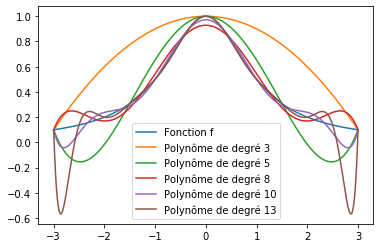

In [29]:
x = np.linspace(-3,3,1000)
plt.plot(x,f(x),label='Fonction f')
n = [3,5,8,10,13]
for m in n:
    x_interp = np.linspace(-3,3,m)
    c = Interp(f,x_interp)
    p = PolyEval(x,c)
    plt.plot(x,p,label='Polynôme de degré '+str(m))
plt.legend()
plt.show()

> **A faire:** Commenter le résultat dans la case suivante.

YOUR ANSWER HERE

On souhaite à présent interpoler la fonction $f$ à l'aide de polynômes de degré $3$ sur des sous-intervalles disjoints de $[-3,3]$. Pour cela, on fournit la fonction `Linspace_interp` qui, étant donné un ensemble de points d'interpolation en abscisse et un entier `n`, va rendre une liste `X` qui contient des vecteurs de points. Ces vecteurs sont en fait des points qui sont situés entre chaque couple successif de points d'interpolation. La somme totale des longueurs de chaque vecteur de `X` est égale à `n` et ces vecteurs sont de tailles quasiment égales.

In [30]:
def Linspace_interp(x_interp,n):
    m = len(x_interp)-1
    n_m = int((n-1)/m)
    r = n-n_m*m
    X = []
    for i in range(m-1):
        h = (x_interp[i+1]-x_interp[i])/(n_m-1)
        X += [np.linspace(x_interp[i],x_interp[i+1]-h,n_m)]
    X += [np.linspace(x_interp[-2],x_interp[-1],n_m+r)]
    return X

Afin d'illustrer l'utilisation de la fonction `Linspace_inter`, on trace la fonction $f$ sur $9$ sous-intervalles uniformes entre $-3$ et $3$ avec $1000$ points au total. On associe un colori différent en fonction du sous-intervalle.

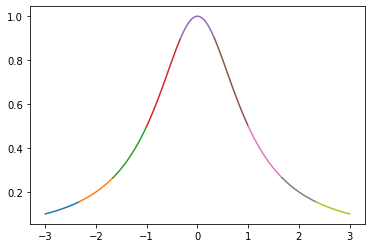

In [31]:
x_interp = np.linspace(-3,3,10)
X = Linspace_interp(x_interp,1000)
for x in X:
    plt.plot(x,f(x))

> **Implémentation:** Implémentez une fonction `Cubic(f,a,b)` qui calcule les coefficients du polynôme de degré $3$ qui interpole $f$ aux points d'abscisses $\{a,(a+b)/2,b\}$. Cette fonction renvoit donc une liste dans laquelle sont stockés les coefficients du polynôme. On choisira une liste commencant par le coefficient constant et terminant par le coefficient associé au monôme de plus haut degré.

In [32]:
def Cubic(f,a,b):
    # Votre code ici
    x = np.array([a, (a+b)/2, b])
    y = f(x)
    n = 3
    M = np.zeros((n, n))
    for i in range(n) : 
        M[:,i] = x**i
    c = np.linalg.solve(M, y)
    return c

> **Test:** Lancer les lignes de code suivantes afin de vérifier votre fonction.

In [33]:
a = 0
b = 1
c = Cubic(f,a,b)
print("c = ",c)
# Vous devez trouver
# c =  [ 1.  -0.3 -0.2]


c =  [ 1.  -0.3 -0.2]


> **Implémentation:** Implémentez une fonction `Spline(f,x_interp,n)` qui va approximer la fonction `f` entre les points d'interpolation `x_interp` par des polynômes de degré $3$. Cette fonction va effectuer une interpolation de `f` entre chaque couple successif de `x_interp` par un polynôme de degré $3$. Elle renverra un vecteur de taille `n` qui sera constitué de l'évaluation de chacun des polynômes dans leurs intervalles respectifs. On pourra utiliser la fonction `np.concatenate((x1,x2),axis = 0)` qui concatene les vecteur `x1` et `x2` selon l'axe des lignes.

In [34]:
def Spline(f,x_interp,n):
    # Votre code ici
    res =np.array([])
    X = Linspace_interp(x_interp,1000)
    for vect in X:
        c=Cubic(f,vect[0],vect[-1])
        res=np.concatenate((res,(PolyEval(vect,c))))
    return res

On trace à présent le résultat de cette interpolation ci-dessous.

> **A faire:** Lancer les lignes de code suivantes.

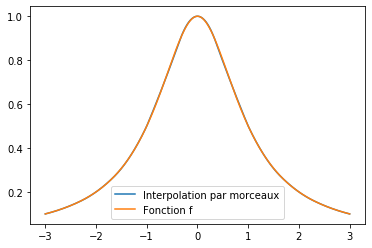

In [35]:
x_interp = np.linspace(-3,3,10)
x = np.linspace(-3,3,1000)
y = Spline(f,x_interp,1000)
plt.plot(x,y,label = 'Interpolation par morceaux')
plt.plot(x,f(x),label = 'Fonction f')
plt.legend()
plt.show()

> **A faire:** Commenter le résultat dans la case suivante.

Votre réponse ici